<a href="https://colab.research.google.com/github/thibaut-tebi/Breast-Cancer-Survival-Prediction-Using-Deep-Learning/blob/main/CNN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!/content/kaggle.json

/bin/bash: line 1: /content/kaggle.json: Permission denied


In [14]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 161MB/s]
100% 1.06G/1.06G [00:11<00:00, 97.3MB/s]


In [15]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/dogs-vs-cats.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path="/kaggle")


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [18]:

#Generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = "/kaggle/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)


test_ds=keras.utils.image_dataset_from_directory(
    directory = "/kaggle/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalisation
def normal(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label


train_ds = train_ds.map (normal)
test_ds = test_ds.map(normal)


In [24]:
#create a CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size= (3,2), padding = 'valid', activation ='relu', input_shape=(256, 256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding ="valid"))


model.add(Conv2D(64, kernel_size= (3,2), padding = 'valid', activation ='relu', input_shape=(256, 256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding ='valid'))


model.add(Conv2D(128, kernel_size= (3,2), padding = 'valid', activation ='relu', input_shape=(256, 256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding ='valid'))


model.add(Flatten())
model.add(Dense(128, activation ="relu"))
model.add(Dropout(0.1))
model.add  (Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation= "sigmoid"))

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 255, 32)      608       
                                                                 
 batch_normalization_7 (Bat  (None, 254, 255, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 126, 64)      12352     
                                                                 
 batch_normalization_8 (Bat  (None, 125, 126, 64)      256       
 chNormalization)                                                
                                                      

In [28]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [29]:
history = model.fit(train_ds, epochs =10, validation_data= test_ds)

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.4225 - accuracy: 0.6108 - val_loss: 0.5882 - val_accuracy: 0.6908
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6035 - accuracy: 0.6894 - val_loss: 0.5487 - val_accuracy: 0.7138
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5010 - accuracy: 0.7526 - val_loss: 0.5394 - val_accuracy: 0.7572
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4417 - accuracy: 0.7882 - val_loss: 0.4584 - val_accuracy: 0.7862
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3785 - accuracy: 0.8246 - val_loss: 0.4626 - val_accuracy: 0.7998
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3427 - accuracy: 0.8442 - val_loss: 0.5347 - val_accuracy: 0.7880
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2936 - accuracy: 0.8681 - val_loss: 0.4590 - val_ac

In [31]:
import matplotlib.pyplot as plt



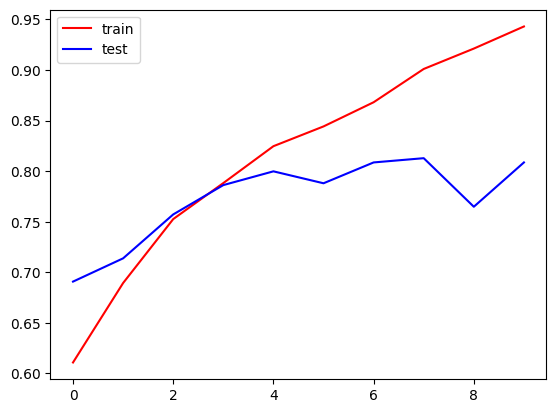

In [35]:
plt.plot(history.history['accuracy'], color ='red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

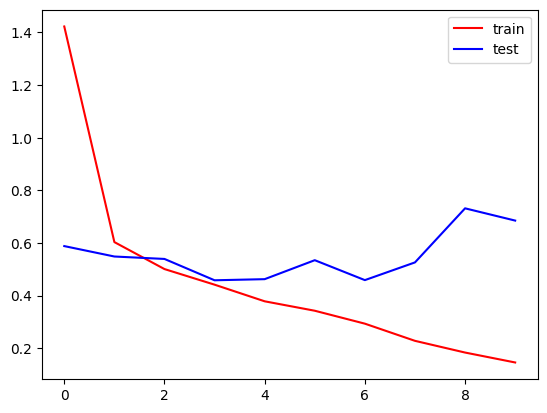

In [36]:
plt.plot(history.history['loss'], color ='red', label = 'train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

In [38]:
import cv2

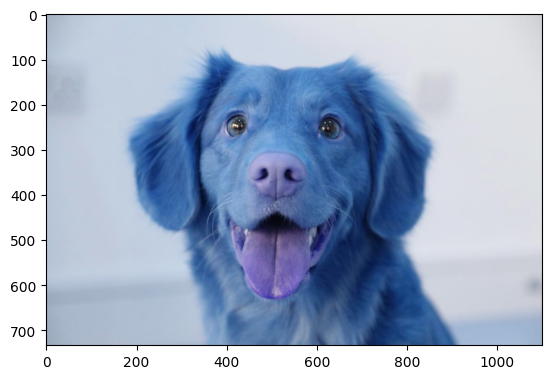

In [41]:
test_img = cv2.imread('/golden-retriever-puppy.jpg')
plt.imshow(test_img)

In [42]:
test_img.shape

(734, 1100, 3)

In [44]:
test_img= cv2.resize(test_img, (256,256))

In [45]:
test_img = test_img.reshape(1,256,256,3)

In [46]:
model.predict(test_img)

1/1 [==============================] - 0s 367ms/step


array([[0.99983907]], dtype=float32)

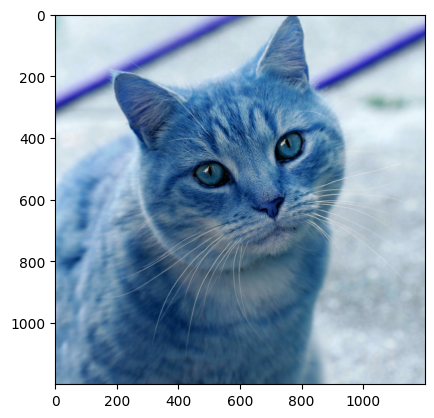

In [47]:
test_img2 = cv2.imread('/Cat03.jpg')
plt.imshow(test_img2)

In [48]:
test_img2.shape

(1199, 1200, 3)

In [49]:
test_img2 = cv2.resize(test_img2, (256,256))
test_img2 = test_img2.reshape(1,256,256,3)

In [50]:
model.predict(test_img2)

1/1 [==============================] - 0s 21ms/step


array([[0.00501729]], dtype=float32)